# Question 1

For the first two problems, it would be helpful for you to draw the decision boundary of your learned tree in the figure.

Consider the problem of predicting if a person has a college degree based on age and salary. The table and graph below contain training data for 10 individuals. Now build a decision tree for classifying whether a person has a college degree by greedily choosing threshold splits that maximize information gain. What is the depth of your tree and the information gain at each split?

A multivariate decision tree is a generalization of univariate decision trees, where more than one attribute can be used in the decision rule for each split. That is, splits need not be orthogonal to a feature’s axis.

For the same data, learn a multivariate decision tree where each decision rule is a linear classifier that makes decisions based on the sign of αxage + βxincome −1. Draw your tree, including the α,β and the information gain for each split.

Multivariate decision tres have practical advantages and disadvantage. List advantages and disadvan- tages you can think of when comparing multivariate decision trees to univariate decision trees.

#### Code to plot decision tree for given data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter as ctrs
from collections import Counter

In [27]:
df = {
    "Age": [24,53,23,25,32,52,22,43,52,48],
    "Salary ($)": [40000,52000,25000,77000,48000,110000,38000,44000,27000,65000],
    "College degree": ['yes','no','no','yes','yes','yes','yes','no','no','yes']
}

In [28]:
df = pd.DataFrame(df)

In [29]:
df = df.replace({'College degree': {'yes':1,'no':0}})

In [30]:
X = df.iloc[:,[0,1]]
y = df['College degree'].values

In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9, 'X[1] <= 32500.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'X[0] <= 52.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.5, 0.5, 'X[1] <= 46000.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.3333333333333333, 0.3, 'X[1] <= 42000.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

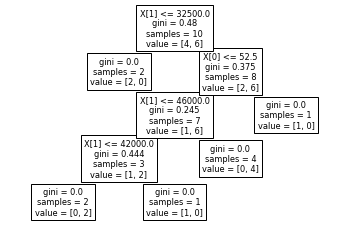

In [32]:
tree.plot_tree(clf)

#### Code to implement DT from scratch


In [33]:
class Node:
 
#constuctor

   def __init__(
       self,
       Y: list,
       X: pd.DataFrame,
       mss=None,
       mx_d=None,
       dh=None,
       n_t=None,
       rl=None
   ):
       self.Y = Y
       self.X = X
 
       self.mss = mss if mss else 20
       self.mx_d = mx_d if mx_d else 5
 
       self.dh = dh if dh else 0
 
       self.fet = list(self.X.columns)
 
       self.n_t = n_t if n_t else 'root'
 
       self.rl = rl if rl else ""
 
       self.cts = ctrs(Y)
 
       self.gi = self.g_gn()
 
       cs = list(sorted(self.cts.items(), key=lambda item: item[1]))
 
       yhat = None
       if len(cs) > 0:
           yhat = cs[-1][0]
 
       self.yhat = yhat
 
       self.n = len(Y)
 
       self.lt = None
       self.rt = None
       self.bt_fue = None
       self.bt_vl = None
 
   @staticmethod
   def ma(x: np.array, window: int) -> np.array:
       return np.convolve(x, np.ones(window), 'valid') / window
 
   def g_gn(self):
 
       yc1, yc2 = self.cts.get(0, 0), self.cts.get(1, 0)
 
       return self.gi(yc1, yc2)

   @staticmethod
   def gi(yc1: int, yc2: int) -> float:
       if yc1 is None:
           yc1 = 0
 
       if yc2 is None:
           yc2 = 0
       n1 = yc1 + yc2
       if n1 == 0:
           return 0.0
 
       p1 = yc1 / n1
       p2 = yc2 / n1
       gn = 1 - (p1 ** 2 + p2 ** 2)
       return gn
 
   def bt_split(self) -> tuple:
 
       df = self.X.copy()
       df['Y'] = self.Y
 
       GNS_base = self.g_gn()
 
       max_ga = 0
 
       bt_fue = None
       bt_vl = None
 
       for fue in self.fet:
           Xdf = df.dropna().sort_vls(fue)
 
           xmeans = self.ma(Xdf[fue].unique(), 2)
 
           for vl in xmeans:
   
               cl = ctrs(Xdf[Xdf[fue]<vl]['Y'])
               cr = ctrs(Xdf[Xdf[fue]>=vl]['Y'])
 
               y0_lt, y1_lt, y0_rt, y1_rt = cl.get(0, 0), cl.get(1, 0), cr.get(0, 0), cr.get(1, 0)
 
               gn_lt = self.gi(y0_lt, y1_lt)
               gn_rt = self.gi(y0_rt, y1_rt)
 
               n_lt = y0_lt + y1_lt
               n_rt = y0_rt + y1_rt
 
               w_lt = n_lt / (n_lt + n_rt)
               w_rt = n_rt / (n_lt + n_rt)
 
               wGNS = w_lt * gn_lt + w_rt * gn_rt
 
               GNSga = GNS_base - wGNS
 
   
               if GNSga > max_ga:
                   bt_fue = fue
                   bt_vl = vl
                   max_ga = GNSga
 
       return (bt_fue, bt_vl)
 
 #function to print information about tree variables

   def print_info(self, width=4):
       const = int(self.dh * width ** 1.5)
       spaces = "-" * const
      
       if self.n_t == 'root':
           print("Root")
       else:
           print(f"|{spaces} Split rl: {self.rl}")
       print(f"{' ' * const} impurity: {round(self.gi, 2)}")
       print(f"{' ' * const} Predicted class: {self.yhat}")  

# Function to create (get the tree)

   def gt(self):
 
       df = self.X.copy()
       df['Y'] = self.Y
 
       if (self.dh < self.mx_d) and (self.n >= self.mss):
 
           bt_fue, bt_vl = self.bt_split()
 
           if bt_fue is not None:
   
               self.bt_fue = bt_fue
               self.bt_vl = bt_vl
 
               lt_df, rt_df = df[df[bt_fue]<=bt_vl].copy(), df[df[bt_fue]>bt_vl].copy()
 
               lt = Node(
                   lt_df['Y'].vls.tolist(),
                   lt_df[self.fet],
                   dh=self.dh + 1,
                   mx_d=self.mx_d,
                   mss=self.mss,
                   n_t='lt_node',
                   rl=f"{bt_fue} <= {round(bt_vl, 3)}"
                   )
 
               self.lt = lt
               self.lt.gt()
 
               rt = Node(
                   rt_df['Y'].vls.tolist(),
                   rt_df[self.fet],
                   dh=self.dh + 1,
                   mx_d=self.mx_d,
                   mss=self.mss,
                   n_t='rt_node',
                   rl=f"{bt_fue} > {round(bt_vl, 3)}"
                   )
 
               self.rt = rt
               self.rt.gt()
 
# Function for the class prediction
 
   def predict(self, X:pd.DataFrame):
 
       pred = []
 
       for _, x in X.iterrows():
           vls = {}
           for fue in self.fet:
               vls.update({fue: x[fue]})
      
           pred.append(self.predict_obs(vls))
      
       return pred

# Function to display the tree

   def pt_tr(self):
 
       self.print_info()
      
       if self.lt is not None:
           self.lt.pt_tr()
      
       if self.rt is not None:
           self.rt.pt_tr()
 

 
   def predict_obs(self, vls: dict) -> int:
 
       cnd = self
       while cnd.dh < cnd.mx_d:
    
           bt_fue,bt_vl = self.bt_split()
          
           if cnd.n < cnd.mss:
               break
 
           if (vls.get(bt_fue) < bt_vl):
               if self.lt is not None:
                   cnd = cnd.lt
           else:
               if self.rt is not None:
                   cnd = cnd.rt
          
       return cnd.yhat



In [34]:
hp = {
 'mx_d': None,
 'mss': 2
}

In [35]:
type(X)

pandas.core.frame.DataFrame

In [36]:
root = Node(y,X,**hp)

In [37]:
root.pt_tr()

Root
 impurity: 0.48
 Predicted class: 1


# Question 2

 #### Q2) In this question, you will need to implement the boosting algorithm AdaBoost as well as a Bagging, in both cases using decision trees as the base classifiers.

Here, for every dataset, we have implemented shallow and deep decision tree adaptive boosting models.

## Spam Dataset - Adaboost
#### https://archive.ics.uci.edu/ml/datasets/spambase

importing required packages

In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

importing data

In [ ]:
# data
df = pd.read_csv('spambase.data', header = None)

# columns
headerName = pd.read_csv('spambase.names', sep = ':', skiprows=range(0, 33), header = None)
col = list(headerName[0])
col.append('Target')
df.columns = col


In [ ]:
# df.head()

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "Target").values, df["Target"].values, random_state = 42) 


functions for calculation of error, beta, and updating weights

In [ ]:
def epsilonT(wTi, y, predicted_y):

  et = wTi[(predicted_y != y)].sum()

  return et

In [ ]:
def betaT(et):
  bt = 0.5 * (np.log((1 - et) / et))

  return bt

In [ ]:
def updateWTi(wTi, y, predicted_y, bt):
  wt2 = (wTi * (np.exp(-bt * y * predicted_y)))

  return wt2


### Shallow Tree

Model design:


In [ ]:
class model_ada:
    
    # constructor for model class
    def __init__(self):
        self.T = 0
        self.err_train = []
        self.err_pred = []
        self.bt_s = []
        self.ht_s = []
        
        

    def modelFit(self, X_train, y, T):
        
        self.T = T
        self.bt_s = [] 
        self.err_train = []
        
        w_i = np.ones(len(y)) * 1 / len(y) 

        for t in range(0, T):
            #TRAINING WITH WT
            # Using decision tree classifier
            ht = DecisionTreeClassifier(max_depth = 1)
            ht.fit(X_train, y, sample_weight = w_i)
            y_pred = ht.predict(X_train)
            
            self.ht_s.append(ht)

            # weighted training error calculation
            et = epsilonT(w_i, y, y_pred)
            self.err_train.append(et)

            # choose beta
            bt = betaT(et)
            self.bt_s.append(bt)

            #update all instance weights
            w_i = updateWTi(w_i, y, y_pred, bt)



    def modelPredict(self, X_test):
            # data with predictions[weak_data_predictions]
            weak = pd.DataFrame(index = range(len(X_test)), columns = range(self.T)) 

            # prediction
            for t in range(self.T):
                predict_yT = self.ht_s[t].predict(X_test) * self.bt_s[t]
                weak.iloc[:,t] = predict_yT

            y_pred = (1 * np.sign(weak.T.sum())).astype(int)

            return y_pred

In [ ]:

# fitting
ab = model_ada()
ab.modelFit(X_train, y_train, T = 400)

# prediction
predictions = ab.modelPredict(X_test)

In [ ]:
print("Classification report: \n", classification_report(y_test, predictions))

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82       676
           1       0.70      0.95      0.81       475

    accuracy                           0.81      1151
   macro avg       0.83      0.83      0.81      1151
weighted avg       0.85      0.81      0.81      1151



In [ ]:
print("Score:", roc_auc_score(y_test, predictions))

Score: 0.8331516661476175


For shallow decision tree Adaboost model, the accuracy is 0.96.

### Deep Tree

In [ ]:
class model_ada:
    
    # constructor for model class
    def __init__(self):
        self.T = 0
        self.err_train = []
        self.err_pred = []
        self.bt_s = []
        self.ht_s = []
        
        

    def modelFit(self, X_train, y, T):
        
        self.T = T
        self.bt_s = [] 
        self.err_train = []
        
        w_i = np.ones(len(y)) * 1 / len(y) 

        for t in range(0, T):
            #TRAINING WITH WT
            # Using decision tree classifier
            ht = DecisionTreeClassifier(max_depth = 100)
            ht.fit(X_train, y, sample_weight = w_i)
            y_pred = ht.predict(X_train)
            
            self.ht_s.append(ht)

            # weighted training error calculation
            et = epsilonT(w_i, y, y_pred)
            self.err_train.append(et)

            # choose beta
            bt = betaT(et)
            self.bt_s.append(bt)

            #update all instance weights
            w_i = updateWTi(w_i, y, y_pred, bt)



    def modelPredict(self, X_test):
            # data with predictions[weak_data_predictions]
            weak = pd.DataFrame(index = range(len(X_test)), columns = range(self.T)) 

            # prediction
            for t in range(self.T):
                predict_yT = self.ht_s[t].predict(X_test) * self.bt_s[t]
                weak.iloc[:,t] = predict_yT

            y_pred = (1 * np.sign(weak.T.sum())).astype(int)

            return y_pred

In [ ]:

# fitting
ab = model_ada()
ab.modelFit(X_train, y_train, T = 400)

# prediction
predictions = ab.modelPredict(X_test)

In [ ]:
print("Classification report: \n", classification_report(y_test, predictions))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.58      0.73       676
           1       0.62      0.98      0.76       475

    accuracy                           0.74      1151
   macro avg       0.80      0.78      0.74      1151
weighted avg       0.83      0.74      0.74      1151



In [ ]:
print("Score:", roc_auc_score(y_test, predictions))

Score: 0.7794145126128933


For deep decision tree Adaboost model, the accuracy is 0.95.



## Spam Dataset - Bagging

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
import seaborn as sns

#### Training and testing bagging models for shallow and deep decision trees

Here, we are using 2 models, first - shallow tree, and second: deep tree.

In [ ]:
Collection_bagging = ["model1", "model2"]

models = []

# creating 2 classifiers = first: shallow , second: deep decision tree

models.append(BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state=42), bootstrap=True, random_state=42))
models.append(BaggingClassifier(DecisionTreeClassifier(max_depth = 100, random_state=42), bootstrap=True, random_state=42))

we have created a pipeline for these models.

In [ ]:
bagging_train_accuracies = []
bagging_test_accuracies = []

for model in models:
    bagging_pipeline = Pipeline(steps = [
              ('bagging_classifier', model)
           ])
    
    
    print(" \n For model", model)
    bagging_model = bagging_pipeline.fit(X_train, y_train)

    print("\nTraining:")
    
    bagging_train_predictions = bagging_model.predict(X_train)
    bagging_train_accuracy = accuracy_score(y_train, bagging_train_predictions)
    bagging_train_accuracies.append(bagging_train_accuracy)
    print("training accuracy of model: ", bagging_train_accuracy)
    
    print("\n Testing: ")

    bagging_test_predictions = bagging_model.predict(X_test)
    bagging_test_accuracy = accuracy_score(y_test, bagging_test_predictions)
    bagging_test_accuracies.append(bagging_test_accuracy)
    print("testing accuracy of model:", bagging_test_accuracy)

    print("\n ================================================ \n")

 
 For model BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=42),
                  random_state=42)

Training:
training accuracy of model:  0.8028985507246377

 Testing: 
testing accuracy of model: 0.7845351867940921


 
 For model BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100,
                                                        random_state=42),
                  random_state=42)

Training:
training accuracy of model:  0.9947826086956522

 Testing: 
testing accuracy of model: 0.9409209383145091




In [ ]:
accuracy_table = pd.DataFrame({'model' : models, 'Training Accuracy' : bagging_train_accuracies, 'Testing Accuracy' : bagging_test_accuracies})

Plot for training and testing accuracies:

[Text(0, 0, 'BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,\n                                                        random_state=42),\n                  random_state=42)'),
 Text(0, 0, 'BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100,\n                                                        random_state=42),\n                  random_state=42)')]

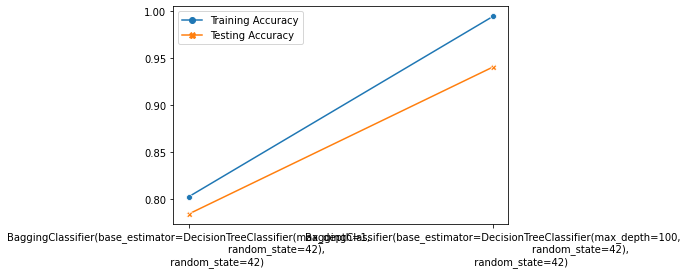

In [ ]:
ax = sns.lineplot(data=[accuracy_table['Training Accuracy'], accuracy_table['Testing Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(accuracy_table['model'])))
ax.set_xticklabels(accuracy_table['model'])

As the maximum accuracy for bagging classifier is 0.94, and for adaboost model is 0.96; the boosting method is efficient for spam data.

## Credit Dataset - Ada Boost
#### https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [ ]:
# data
df = pd.read_csv('german.data', header = None, sep = '\s+')




In [ ]:
headers = ["Existing-Account-Status","Month-Duration","Credit-History","Purpose","Credit-Amount","Saving-Acount","Present-Employment","Instalment-Rate","Sex","Guarantors","Residence","Property","Age","Installment","Housing","Existing-Credits","Job","Num-People","Telephone","Foreign-Worker","Status"]



In [ ]:
df.to_csv("gn.csv", header=headers, index=False)

In [ ]:
df2 = pd.read_csv("gn.csv")

In [ ]:
df2.head()

,Existing-Account-Status,Month-Duration,Credit-History,Purpose,Credit-Amount,Saving-Acount,Present-Employment,Instalment-Rate,Sex,Guarantors,...,Property,Age,Installment,Housing,Existing-Credits,Job,Num-People,Telephone,Foreign-Worker,Status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
CategoricalFeatures=['Existing-Account-Status','Credit-History','Purpose','Saving-Acount', 'Present-Employment', 'Sex','Guarantors','Property','Installment','Housing','Job','Telephone','Foreign-Worker']


In [ ]:
data_encode=df2.copy()
data_visual=df2.copy()
data_encode.head(5)

,Existing-Account-Status,Month-Duration,Credit-History,Purpose,Credit-Amount,Saving-Acount,Present-Employment,Instalment-Rate,Sex,Guarantors,...,Property,Age,Installment,Housing,Existing-Credits,Job,Num-People,Telephone,Foreign-Worker,Status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
for x in CategoricalFeatures:
    data_encode[x]=label_encoder.fit_transform(data_encode[x])
    data_encode[x].unique()


In [ ]:
data_encode.head(4)

,Existing-Account-Status,Month-Duration,Credit-History,Purpose,Credit-Amount,Saving-Acount,Present-Employment,Instalment-Rate,Sex,Guarantors,...,Property,Age,Installment,Housing,Existing-Credits,Job,Num-People,Telephone,Foreign-Worker,Status
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1


In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(data_encode.drop(columns = "Status").values, data_encode["Status"].values, random_state = 42) 


In [ ]:
def epsilonT(wTi, y, predicted_y):

  et = wTi[(predicted_y != y)].sum()

  return et

In [ ]:
def betaT(et):
  bt = 0.5 * (np.log((1 - et) / et))

  return bt

In [ ]:
def updateWTi(wTi, y, predicted_y, bt):
  wt2 = (wTi * (np.exp(-bt * y * predicted_y)))

  return wt2

### Shallow Tree

In [ ]:
class model_ada:
    
    # constructor for model class
    def __init__(self):
        self.T = 0
        self.err_train = []
        self.err_pred = []
        self.bt_s = []
        self.ht_s = []
        
        

    def modelFit(self, X_train, y, T):
        
        self.T = T
        self.bt_s = [] 
        self.err_train = []
        
        w_i = np.ones(len(y)) * 1 / len(y) 

        for t in range(0, T):
            #TRAINING WITH WT
            # Using decision tree classifier
            ht = DecisionTreeClassifier(max_depth = 1)
            ht.fit(X_train, y, sample_weight = w_i)
            y_pred = ht.predict(X_train)
            
            self.ht_s.append(ht)

            # weighted training error calculation
            et = epsilonT(w_i, y, y_pred)
            self.err_train.append(et)

            # choose beta
            bt = betaT(et)
            self.bt_s.append(bt)

            #update all instance weights
            w_i = updateWTi(w_i, y, y_pred, bt)



    def modelPredict(self, X_test):
            # data with predictions[weak_data_predictions]
            weak = pd.DataFrame(index = range(len(X_test)), columns = range(self.T)) 

            # prediction
            for t in range(self.T):
                predict_yT = self.ht_s[t].predict(X_test) * self.bt_s[t]
                weak.iloc[:,t] = predict_yT

            y_pred = (1 * np.sign(weak.T.sum())).astype(int)

            return y_pred

In [ ]:

# fitting
ab = model_ada()
ab.modelFit(X_train, y_train, T = 400)

# prediction
predictions = ab.modelPredict(X_test)

<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by 

In [ ]:
print("Classification report: \n", accuracy_score(y_test, predictions))

Classification report: 
 0.712


For shallow decision tree Adaboost model, the accuracy is 0.71.

### Deep Tree

In [ ]:
class model_ada:
    
    # constructor for model class
    def __init__(self):
        self.T = 0
        self.err_train = []
        self.err_pred = []
        self.bt_s = []
        self.ht_s = []
        
        

    def modelFit(self, X_train, y, T):
        
        self.T = T
        self.bt_s = [] 
        self.err_train = []
        
        w_i = np.ones(len(y)) * 1 / len(y) 

        for t in range(0, T):
            #TRAINING WITH WT
            # Using decision tree classifier
            ht = DecisionTreeClassifier(max_depth = 100)
            ht.fit(X_train, y, sample_weight = w_i)
            y_pred = ht.predict(X_train)
            
            self.ht_s.append(ht)

            # weighted training error calculation
            et = epsilonT(w_i, y, y_pred)
            self.err_train.append(et)

            # choose beta
            bt = betaT(et)
            self.bt_s.append(bt)

            #update all instance weights
            w_i = updateWTi(w_i, y, y_pred, bt)



    def modelPredict(self, X_test):
            # data with predictions[weak_data_predictions]
            weak = pd.DataFrame(index = range(len(X_test)), columns = range(self.T)) 

            # prediction
            for t in range(self.T):
                predict_yT = self.ht_s[t].predict(X_test) * self.bt_s[t]
                weak.iloc[:,t] = predict_yT

            y_pred = (1 * np.sign(weak.T.sum())).astype(int)

            return y_pred

In [ ]:

# fitting
ab = model_ada()
ab.modelFit(X_train, y_train, T = 400)

# prediction
predictions = ab.modelPredict(X_test)

<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-102-31dc92c93caa>:2: RuntimeWarning: divide by 

In [ ]:
print("Classification report: \n", accuracy_score(y_test, predictions))

Classification report: 
 0.712


## Credit Dataset - Bagging

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
import seaborn as sns

#### Training and testing bagging models for shallow and deep decision trees

In [ ]:
Collection_bagging = ["model1", "model2"]

models = []

# creating 2 classifiers = first: shallow , second: deep decision tree

models.append(BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state=42), bootstrap=True, random_state=42))
models.append(BaggingClassifier(DecisionTreeClassifier(max_depth = 100, random_state=42), bootstrap=True, random_state=42))


In [ ]:
bagging_train_accuracies = []
bagging_test_accuracies = []

for model in models:
    bagging_pipeline = Pipeline(steps = [
              ('bagging_classifier', model)
           ])
    
    
    print(" \n For model", model)
    bagging_model = bagging_pipeline.fit(X_train, y_train)

    print("\nTraining:")
    
    bagging_train_predictions = bagging_model.predict(X_train)
    bagging_train_accuracy = accuracy_score(y_train, bagging_train_predictions)
    bagging_train_accuracies.append(bagging_train_accuracy)
    print("training accuracy of model: ", bagging_train_accuracy)
    
    print("\n Testing: ")

    bagging_test_predictions = bagging_model.predict(X_test)
    bagging_test_accuracy = accuracy_score(y_test, bagging_test_predictions)
    bagging_test_accuracies.append(bagging_test_accuracy)
    print("testing accuracy of model:", bagging_test_accuracy)

    print("\n ================================================ \n")

 
 For model BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=42),
                  random_state=42)

Training:
training accuracy of model:  0.696

 Testing: 
testing accuracy of model: 0.712


 
 For model BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100,
                                                        random_state=42),
                  random_state=42)

Training:
training accuracy of model:  0.98

 Testing: 
testing accuracy of model: 0.728




In [ ]:
accuracy_table = pd.DataFrame({'model' : models, 'Training Accuracy' : bagging_train_accuracies, 'Testing Accuracy' : bagging_test_accuracies})

[Text(0, 0, 'BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,\n                                                        random_state=42),\n                  random_state=42)'),
 Text(0, 0, 'BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100,\n                                                        random_state=42),\n                  random_state=42)')]

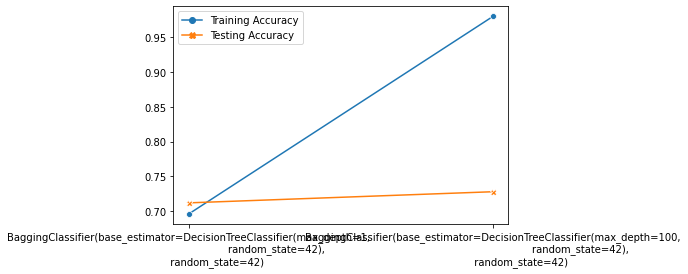

In [ ]:
ax = sns.lineplot(data=[accuracy_table['Training Accuracy'], accuracy_table['Testing Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(accuracy_table['model'])))
ax.set_xticklabels(accuracy_table['model'])

As the maximum accuracy for adaboost model is 0.71, and for bagging model is 0.72; the bagging model with deep decision tree is efficient for classification of credit data.

## Letter Dataset - Ada Boost

#### https://archive.ics.uci.edu/ml/datasets/letter+recognition

In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# data
df = pd.read_csv('letter-recognition.data', header = None)

# # columns
# headerName = pd.read_csv('D:\IUB\COURSE WORK\FALL 2022\APPLIED MACHINE LEARNING\ASSIGNMENTS\ASSIGNMENT 4\spambase.names', sep = ':', skiprows=range(0, 33), header = None)
# col = list(headerName[0])
# col.append('Target')
# df.columns = col


In [ ]:
headers = ["lettr","x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]

In [ ]:
df.to_csv("lrec.csv", header=headers, index=False)

In [ ]:
df2 = pd.read_csv("lrec.csv")

In [ ]:
df2.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data_encode = df2

In [ ]:

data_encode["lettr"]=label_encoder.fit_transform(data_encode["lettr"])
data_encode["lettr"].unique()


array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [ ]:
# df.head()

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(data_encode.drop(columns = "lettr").values, data_encode["lettr"].values, random_state = 42) 


In [ ]:
def epsilonT(wTi, y, predicted_y):

  et = wTi[(predicted_y != y)].sum()

  return et

In [ ]:
def betaT(et):
  bt = 0.5 * (np.log((1 - et) / et))

  return bt

In [ ]:
def updateWTi(wTi, y, predicted_y, bt):
  wt2 = (wTi * (np.exp(-bt * y * predicted_y)))

  return wt2

 ### Shallow Tree

In [ ]:
class model_ada:
    
    # constructor for model class
    def __init__(self):
        self.T = 0
        self.err_train = []
        self.err_pred = []
        self.bt_s = []
        self.ht_s = []
        
        

    def modelFit(self, X_train, y, T):
        
        self.T = T
        self.bt_s = [] 
        self.err_train = []
        
        w_i = np.ones(len(y)) * 1 / len(y) 

        for t in range(0, T):
            #TRAINING WITH WT
            # Using decision tree classifier
            ht = DecisionTreeClassifier(max_depth = 1)
            ht.fit(X_train, y, sample_weight = w_i)
            y_pred = ht.predict(X_train)
            
            self.ht_s.append(ht)

            # weighted training error calculation
            et = epsilonT(w_i, y, y_pred)
            self.err_train.append(et)

            # choose beta
            bt = betaT(et)
            self.bt_s.append(bt)

            #update all instance weights
            w_i = updateWTi(w_i, y, y_pred, bt)



    def modelPredict(self, X_test):
            # data with predictions[weak_data_predictions]
            weak = pd.DataFrame(index = range(len(X_test)), columns = range(self.T)) 

            # prediction
            for t in range(self.T):
                predict_yT = self.ht_s[t].predict(X_test) * self.bt_s[t]
                weak.iloc[:,t] = predict_yT

            y_pred = (1 * np.sign(weak.T.sum())).astype(int)

            return y_pred

In [ ]:

# fitting
ab = model_ada()
ab.modelFit(X_train, y_train, T = 400)

# prediction
predictions = ab.modelPredict(X_test)

<ipython-input-127-31dc92c93caa>:2: RuntimeWarning: invalid value encountered in log
  bt = 0.5 * (np.log((1 - et) / et))


ValueError: ignored

In [ ]:
print("Classification report: \n", classification_report(y_test, predictions))

In [ ]:
print("Score:", roc_auc_score(y_test, predictions))

### Deep Tree

In [ ]:
class model_ada:
    
    # constructor for model class
    def __init__(self):
        self.T = 0
        self.err_train = []
        self.err_pred = []
        self.bt_s = []
        self.ht_s = []
        
        

    def modelFit(self, X_train, y, T):
        
        self.T = T
        self.bt_s = [] 
        self.err_train = []
        
        w_i = np.ones(len(y)) * 1 / len(y) 

        for t in range(0, T):
            #TRAINING WITH WT
            # Using decision tree classifier
            ht = DecisionTreeClassifier(max_depth = 100)
            ht.fit(X_train, y, sample_weight = w_i)
            y_pred = ht.predict(X_train)
            
            self.ht_s.append(ht)

            # weighted training error calculation
            et = epsilonT(w_i, y, y_pred)
            self.err_train.append(et)

            # choose beta
            bt = betaT(et)
            self.bt_s.append(bt)

            #update all instance weights
            w_i = updateWTi(w_i, y, y_pred, bt)



    def modelPredict(self, X_test):
            # data with predictions[weak_data_predictions]
            weak = pd.DataFrame(index = range(len(X_test)), columns = range(self.T)) 

            # prediction
            for t in range(self.T):
                predict_yT = self.ht_s[t].predict(X_test) * self.bt_s[t]
                weak.iloc[:,t] = predict_yT

            y_pred = (1 * np.sign(weak.T.sum())).astype(int)

            return y_pred

In [ ]:

# fitting
ab = model_ada()
ab.modelFit(X_train, y_train, T = 400)

# prediction
predictions = ab.modelPredict(X_test)

<ipython-input-127-31dc92c93caa>:2: RuntimeWarning: divide by zero encountered in double_scalars
  bt = 0.5 * (np.log((1 - et) / et))
<ipython-input-128-b7219f959f44>:2: RuntimeWarning: invalid value encountered in multiply
  wt2 = (wTi * (np.exp(-bt * y * predicted_y)))


ValueError: ignored

In [ ]:
print("Classification report: \n", classification_report(y_test, predictions))

In [ ]:
print("Score:", roc_auc_score(y_test, predictions))

## Letter dataset - Bagging

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
import seaborn as sns

#### Training and testing bagging models for shallow and deep decision trees

In [ ]:
Collection_bagging = ["model1", "model2"]

models = []

# creating 2 classifiers = first: shallow , second: deep decision tree

models.append(BaggingClassifier(DecisionTreeClassifier(max_depth = 1, random_state=42), bootstrap=True, random_state=42))
models.append(BaggingClassifier(DecisionTreeClassifier(max_depth = 100, random_state=42), bootstrap=True, random_state=42))


In [ ]:
bagging_train_accuracies = []
bagging_test_accuracies = []

for model in models:
    bagging_pipeline = Pipeline(steps = [
              ('bagging_classifier', model)
           ])
    
    
    print(" \n For model", model)
    bagging_model = bagging_pipeline.fit(X_train, y_train)

    print("\nTraining:")
    
    bagging_train_predictions = bagging_model.predict(X_train)
    bagging_train_accuracy = accuracy_score(y_train, bagging_train_predictions)
    bagging_train_accuracies.append(bagging_train_accuracy)
    print("training accuracy of model: ", bagging_train_accuracy)
    
    print("\n Testing: ")

    bagging_test_predictions = bagging_model.predict(X_test)
    bagging_test_accuracy = accuracy_score(y_test, bagging_test_predictions)
    bagging_test_accuracies.append(bagging_test_accuracy)
    print("testing accuracy of model:", bagging_test_accuracy)

    print("\n ================================================ \n")

 
 For model BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=42),
                  random_state=42)

Training:
training accuracy of model:  0.0708

 Testing: 
testing accuracy of model: 0.0672


 
 For model BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100,
                                                        random_state=42),
                  random_state=42)

Training:
training accuracy of model:  0.9984

 Testing: 
testing accuracy of model: 0.9238




In [ ]:
accuracy_table = pd.DataFrame({'model' : models, 'Training Accuracy' : bagging_train_accuracies, 'Testing Accuracy' : bagging_test_accuracies})

[Text(0, 0, 'BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,\n                                                        random_state=42),\n                  random_state=42)'),
 Text(0, 0, 'BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100,\n                                                        random_state=42),\n                  random_state=42)')]

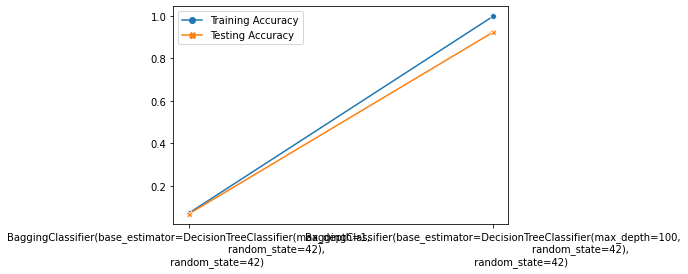

In [ ]:
ax = sns.lineplot(data=[accuracy_table['Training Accuracy'], accuracy_table['Testing Accuracy']], dashes=False, markers=True)
ax.set_xticks(range(len(accuracy_table['model'])))
ax.set_xticklabels(accuracy_table['model'])

The maximum accuracy for bagging classifier for deep decision tree is 0.92. Thus, bagging model is better for letter dataset.